在前几节基于Fashion-MNIST数据集的实验中，我们评价了机器学习模型在训练数据集和测试数据集上的表现。如果你改变过实验中的模型结构或者超参数，你也许发现了：当模型在训练数据集上更准确时，它在测试数据集上却不一定更准确。这是为什么呢？

# 3.11.1 训练误差和泛化误差
在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalization error）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如线性回归用到的平方损失函数和softmax回归用到的交叉熵损失函数。

让我们以高考为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做往年高考试题（训练题）时的错误率，泛化误差则可以通过真正参加高考（测试题）时的答题错误率来近似。假设训练题和测试题都随机采样于一个未知的依照相同考纲的巨大试题库。如果让一名未学习中学知识的小学生去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成一名反复练习训练题的高三备考生答题，即使在训练题上做到了错误率为0，也不代表真实的高考成绩会如此。

在机器学习里，我们通常假设训练数据集（训练题）和测试数据集（测试题）里的每一个样本都是从同一个概率分布中相互独立地生成的。基于该独立同分布假设，给定任意一个机器学习模型（含参数），它的训练误差的期望和泛化误差都是一样的。例如，如果我们将模型参数设成随机值（小学生），那么训练误差和泛化误差会非常相近。但我们从前面几节中已经了解到，模型的参数是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差（高三备考生）。所以，训练误差的期望小于或等于泛化误差。也就是说，一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。

机器学习模型应关注降低泛化误差

# 3.11.2 模型选择
在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为模型选择（model selection）。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模型选择上下一番功夫。下面，我们来描述模型选择中经常使用的验证数据集（validation data set）

# 3.11.2.1 验证数据集
从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

然而在实际应用中，由于数据不容易获取，测试数据极少只使用一次就丢弃。因此，实践中验证数据集和测试数据集的界限可能比较模糊。从严格意义上讲，除非明确说明，否则本书中实验所使用的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）

# 3.11.2.3 K折交叉验证
由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是K折交叉验证（K-fold cross-validation）。在K折交叉验证中，我们把原始训练数据集分割成K个不重合的子数据集，然后我们做K次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他K−1个子数据集来训练模型。在这K次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均

# 3.11.3 欠拟合和过拟合
接下来，我们将探究模型训练中经常出现的两类典型问题：一类是模型无法得到较低的训练误差，我们将这一现象称作欠拟合（underfitting）；另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为过拟合（overfitting）。在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型复杂度和训练数据集大小

# 3.11.3.1 模型复杂度
为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征x和对应的标量标签y组成的训练数据集，多项式函数拟合的目标是找一个K阶多项式函数 y = b + ∑ x^k * wk 来近似 y。在上式中，wk是模型的权重参数，b是偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数模型参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此，高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如图3.4所示。给定训练数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型

# 3.11.3.2 训练数据集大小
影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型

# 3.11.4 多项式函数拟合实验
为了理解模型复杂度和训练数据集大小对欠拟合和过拟合的影响，下面我们以多项式函数拟合为例来实验。首先导入实验需要的包或模块

In [88]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

# 3.11.4.1 生成数据集
我们将生成一个人工数据集。在训练数据集和测试数据集中，给定样本特征x，我们使用如下的三阶多项式函数来生成该样本的标签：

y = 1.2x − 3.4x^2 + 5.6x^3 + 5 + ϵ,

其中噪声项ϵ服从均值为0、标准差为0.01的正态分布。训练数据集和测试数据集的样本数都设为100

In [89]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5

# torch.randn(): 从标准正态分布N(0,1)中随机抽样
# 形状(n_train + n_test, 1): 生成200个样本，每个样本1个特征
features = torch.randn((n_train + n_test, 1))

# torch.pow(features, 2): 计算x²，特征的平方
# torch.pow(features, 3): 计算x³，特征的立方
# torch.cat(..., 1): 在列方向(维度1)上拼接这三个特征
# 结果形状为(200, 3)的张量
# 每行代表一个样本，包含[x, x², x³]三个特征
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 

# 根据三次多项式方程y = 1.2x - 3.4x² + 5.6x³ + 5生成标签：
# true_w[0] * poly_features[:, 0]: 1.2x项
# true_w[1] * poly_features[:, 1]: -3.4x²项
# true_w[2] * poly_features[:, 2]: 5.6x³项
# + true_b: 加上偏置项5
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)

# 添加噪声使数据更接近现实情况，模拟测量误差
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

看一看生成的数据集的前两个样本

In [90]:
# features[:2]：显示原始特征的前两个样本，形状为 (2, 1)
# poly_features[:2]：显示多项式特征的前两个样本，形状为 (2, 3)，每行包括三个值：x, x², x³
# labels[:2]：显示前两个样本的标签，形状为 (2, )
features[:2], poly_features[:2], labels[:2]

(tensor([[ 1.0003],
         [-0.4066]]),
 tensor([[ 1.0003,  1.0006,  1.0009],
         [-0.4066,  0.1653, -0.0672]]),
 tensor([8.4053, 3.5814]))

# 3.11.4.2 定义、训练和测试模型
我们先定义作图函数semilogy，其中 y 轴使用了对数尺度

In [91]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
# 对数尺度是一种非线性刻度，其中：
# 相等的视觉距离代表值的相等倍数变化，而非相等的加法变化
# 例如：在以10为底的对数刻度中，从1到10、从10到100的视觉距离相同
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

和线性回归一样，多项式函数拟合也使用平方损失函数。因为我们将尝试使用不同复杂度的模型来拟合生成的数据集，所以我们把模型定义部分放在fit_and_plot函数中。多项式函数拟合的训练和测试步骤与3.6节（softmax回归的从零开始实现）介绍的softmax回归中的相关步骤类似

In [92]:
# num_epochs = 100: 设置训练总轮数为10
# loss = torch.nn.MSELoss(): 使用均方误差(MSE)作为损失函数
num_epochs, loss = 100, torch.nn.MSELoss()

# 定义函数接收四个参数：训练特征、测试特征、训练标签、测试标签
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    # train_features.shape[-1]: 获取最后一个维度的大小，这是特征的数量，也是输入维度
    # 1: 输出维度为1（回归预测单个值）
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了

    # 设置批量大小为10或训练样本数量的较小值，防止批量大小大于数据集大小的情况
    batch_size = min(10, train_labels.shape[0])    

    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    # 使用随机梯度下降(SGD)优化器，学习率设为0.01，传入所有需要优化的模型参数
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

    # 创建两个空列表存储每个epoch的训练和测试损失
    train_ls, test_ls = [], []

    for _ in range(num_epochs):
        for X, y in train_iter:
            # loss(net(X), y.view(-1, 1)): 计算预测值与真实值的MSE损失
            # y.view(-1, 1)将标签重塑为列向量
            # optimizer.zero_grad(): 清除上一批次的梯度
            # l.backward(): 反向传播计算梯度
            # optimizer.step(): 更新模型参数
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        
        # 将标签重塑为列向量，匹配模型输出形状
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)

        # 计算并记录整个训练集和测试集上的损失
        # .item(): 将单元素张量转换为Python标量
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())

    # 显示训练完成后的最终训练损失和测试损失
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])

    # semilogy: 使用对数尺度y轴绘制损失曲线
    # x轴：epoch索引(1-100)
    # y轴：使用对数尺度显示损失值
    # 绘制两条曲线：训练损失和测试损失
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    
    # 显示训练后的模型权重和偏置，用于分析模型学到了什么
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)

# 3.11.4.3 三阶多项式函数拟合（正常）
我们先使用与数据生成函数同阶的三阶多项式函数拟合。实验表明，这个模型的训练误差和在测试数据集的误差都较低。训练出的模型参数也接近真实值：w1 = 1.2, w2 = −3.4, w3 = 5.6, b = 5

final epoch: train loss 9.784495341591537e-05 test loss 0.00011569981143111363
weight: tensor([[ 1.2019, -3.3992,  5.6007]]) 
bias: tensor([4.9999])


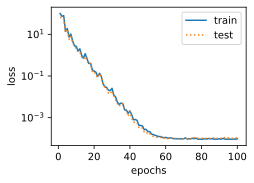

In [93]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
            labels[:n_train], labels[n_train:])

# 训练特征：poly_features[:n_train, :]
# 含义：多项式特征矩阵的前100行
# 形状：(100, 3) - 100个样本，每个样本3个特征
# 内容：前100个样本的 [x, x², x³] 特征
# 用途：用于训练模型的输入数据
# 相对应的，测试特征是多项式特征矩阵的后100行

# 训练标签：labels[:n_train]
# 含义：标签向量的前100个元素
# 形状：(100,) - 100个标量值
# 内容：根据公式 1.2x - 3.4x² + 5.6x³ + 5 + 噪声 生成的前100个标签
# 用途：训练模型时的目标输出值
# 相对应的，测试标签是标签向量的后100个元素

# 3.11.4.4 线性函数拟合（欠拟合）
我们再试试线性函数拟合。很明显，该模型的训练误差在迭代早期下降后便很难继续降低。在完成最后一次迭代周期后，训练误差依旧很高。线性模型在非线性模型（如三阶多项式函数）生成的数据集上容易欠拟合

final epoch: train loss 318.6249694824219 test loss 307.1192626953125
weight: tensor([[21.2610]]) 
bias: tensor([1.1417])


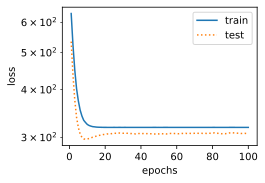

In [94]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

# 3.11.4.5 训练样本不足（过拟合）
事实上，即便使用与数据生成模型同阶的三阶多项式函数模型，如果训练样本不足，该模型依然容易过拟合。让我们只使用两个样本来训练模型。显然，训练样本过少了，甚至少于模型参数的数量。这使模型显得过于复杂，以至于容易被训练数据中的噪声影响。在迭代过程中，尽管训练误差较低，但是测试数据集上的误差却很高。这是典型的过拟合现象

final epoch: train loss 0.21068717539310455 test loss 389.5545959472656
weight: tensor([[1.6308, 1.5383, 1.7950]]) 
bias: tensor([3.4621])


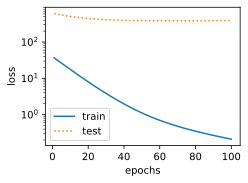

In [95]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])

我们将在接下来的两个小节继续讨论过拟合问题以及应对过拟合的方法

# 小结
由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。机器学习模型应关注降低泛化误差。

可以使用验证数据集来进行模型选择。

欠拟合指模型无法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集上的误差。

应选择复杂度合适的模型并避免使用过少的训练样本